In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from itertools import cycle, islice

## 1. Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора:

In [ ]:
def visualize(polygons, size = 10):
    fig, ax = plt.subplots()
    aq = plt.gca()
    aq.axhline(y=0, color='k')
    aq.axvline(x=0, color='k')
    for polygon in polygons:
        x, y = [i[0] for i in polygon], [i[1]  for i in polygon]
        x.append(x[0])
        y.append(y[0])
        ax.plot(x, y, color='blue')
        plt.ylim(-size, size)
        plt.xlim((-size, size))
    ax.set_aspect('equal')
    plt.show()

# 2. Реализовать функции, генерирующие бесконечную последовательность не пересекающихся полигонов с различающимися координатами:

2.1

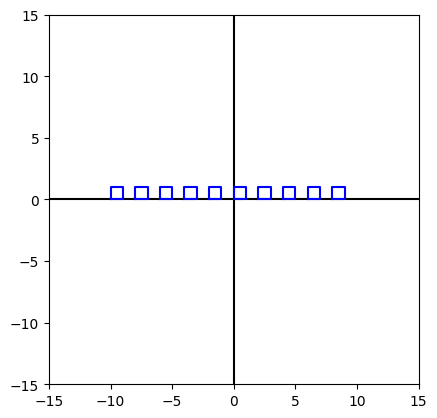

In [ ]:
total = 10
dx = -10
dy = 0
def gen_rectangle(k, dx, dy):
    """Генерирует бесконечную последовательность прямоугольников"""
    return (0 + k * 2 + dx, 0 + dy), (0 + k * 2 + dx, 1 + dy), (1 + k * 2  + dx, 1 + dy), (1 + k * 2 + dx, 0 + dy)

gen_rectangles = [(gen_rectangle(i, dx, dy)) for i in range(total)]
visualize(gen_rectangles,15)

2.2

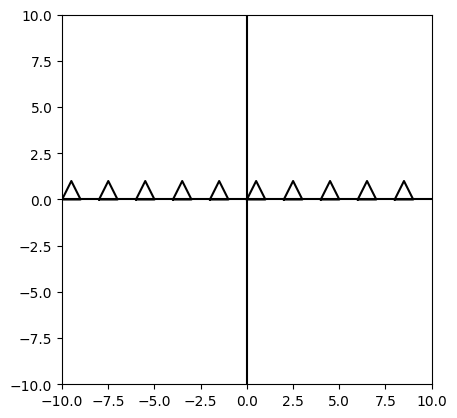

In [ ]:
total = 10
dx = -10
dy = 0
def gen_triangle(k, dx, dy):
    """Генерирует бесконечную последовательность треугольников"""
    return (0 + k * 2 + dx, 0 + dy), (0.5 + k * 2 + dx, 1 + dy), (1 + k * 2 + dx, 0 + dy)
gen_triangles = [(gen_triangle(i, dx, dy)) for i in range(total)]
visualize(gen_triangles)

2.3

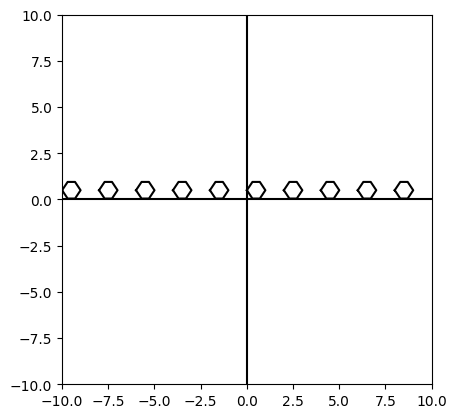

In [ ]:
total = 10
dx = -10
dy = 0
def gen_hexagon(k, dx, dy):
    """Генерирует бесконечную последовательность шестиугольников"""
    return (0 + k * 2 + dx, 0.5 + dy), (0.3 + k * 2 + dx, 0.05 + dy), (0.7 + k * 2 + dx, 0.05 + dy), \
        (1 + k * 2 + dx, 0.5 + dy), (0.7 + k * 2 + dx, 0.95 + dy), (0.3 + k * 2 + dx, 0.95 + dy)
gen_hexagons = [(gen_hexagon(i, dx, dy)) for i in range(total)]
visualize(gen_hexagons)

2.4

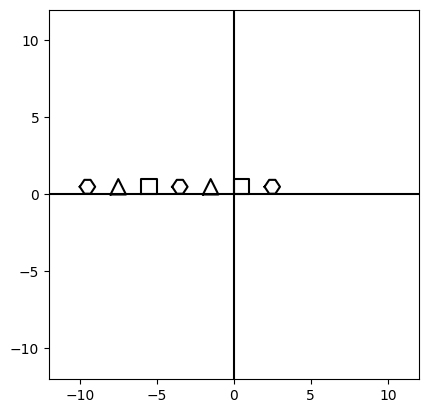

In [ ]:
total = 7
dx = -10
dy = 0


def func(total, dx, dy):  # cycle
    k = 0
    for i in range(total):
        if i % 3 == 2:
            yield gen_rectangle(k, dx, dy)
        elif i % 3 == 1:
            yield gen_triangle(k, dx, dy)
        else:
            yield gen_hexagon(k, dx, dy)
        k += 1

gen_mix = list(func(total, dx, dy))
visualize(gen_mix,12)

# 3. Реализовать операции:

3.1. поворот ( tr_rotate )

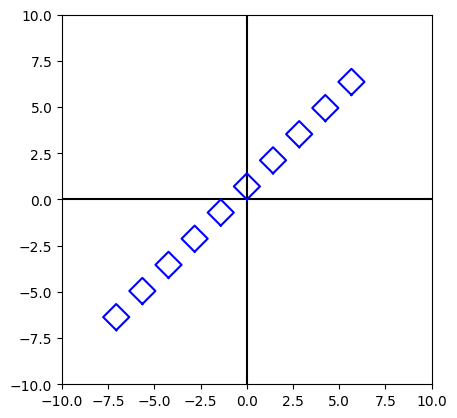

In [ ]:
def tr_rotate(vertices, angle):
    # Преобразование угла поворота из градусов в радианы
    theta = np.radians(angle)

    # Матрица поворота
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

    # Поворот вершин квадрата на заданный угол
    rotated_vertices = []
    for v in vertices:
        x = v[0]
        y = v[1]

        rotated_x = rotation_matrix[0][0] * x + rotation_matrix[0][1] * y
        rotated_y = rotation_matrix[1][0] * x + rotation_matrix[1][1] * y

        rotated_vertices.append((rotated_x, rotated_y))

    return rotated_vertices

total = 10
dx = -10
dy = 0
gen_rectangles = [(gen_rectangle(i, dx, dy)) for i in range(total)]
angle = 45


angle = [angle for i in range(total)]
new_rectangles = list(map(tr_rotate, gen_rectangles, angle))
visualize(new_rectangles)

3.2. параллельный перенос ( tr_translate )

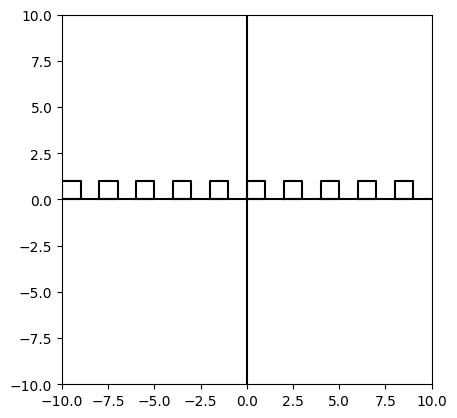

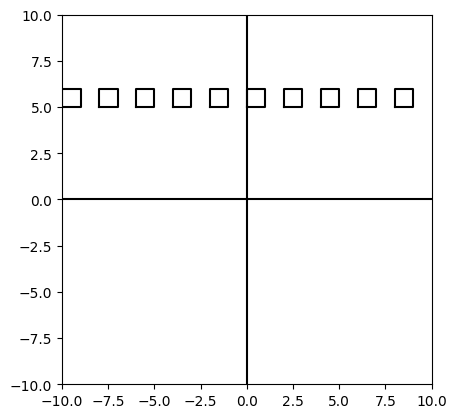

In [ ]:
def tr_translate(vertices, dx, dy):
    # Параллельный перенос вершин полигона
    translated_vertices = []
    for vertex in vertices:
        translated_vertices.append((vertex[0] + dx, vertex[1] + dy))

    return translated_vertices

total = 10
dx = -10
dy = 0
gen_rectangles = [(gen_rectangle(i, dx, dy)) for i in range(total)]
visualize(gen_rectangles)
angle = 40

dx = [0 for i in range(total)]
dy = [5 for i in range(total)]
angle = [angle for i in range(total)]
new_rectangles = list(map(tr_translate, gen_rectangles, dx, dy))
visualize(new_rectangles)

3.3 симметрия ( tr_symmetry )

In [ ]:
def tr_symmetry(vertices, angle, dx=0, dy=0):
    # angle = [angle for i in range(len(vertices))]
    # dx = [dx for i in range(len(vertices))]
    # dy = [dy for i in range(len(vertices))]
    vertex = tr_translate(vertices, dx, dy)
    vertex = tr_rotate(vertex, angle)

    return vertex


3.4 гомотетия ( tr_homothety )

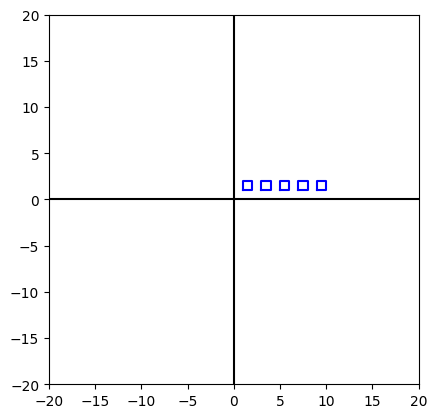

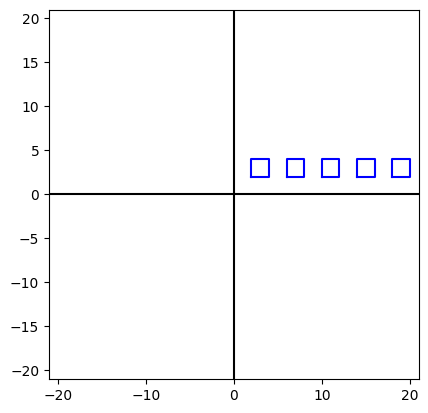

In [ ]:
def tr_homothety(coords, k = 2):
  x = [i[0] * k for i in coords]
  y = [i[1] * k for i in coords]
  xy = zip(x, y)
  return tuple(tuple(i) for i in xy)
gen_rectangles = [(gen_rectangle(i, 1, 1)) for i in range(5)]
visualize(gen_rectangles,20)
new_reactangles= list(map(tr_homothety, gen_rectangles))
visualize(new_reactangles, 21)

# 4. С помощью данных функций создать и визуализировать:

4.1 поворот ( tr_rotate )

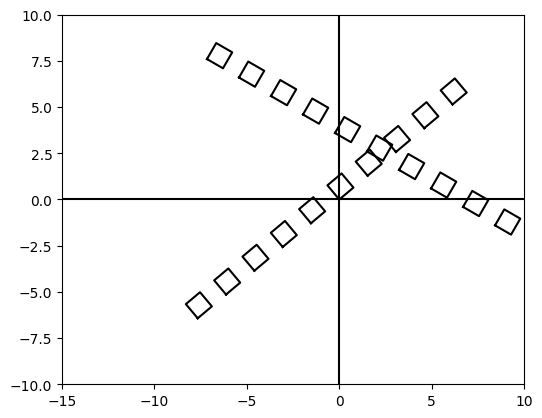

In [ ]:
total = 10
dx = -10
dy = 0
angle = 40
new_angle = -30

angle = [angle for i in range(total)]
gen_rectangles = [(gen_rectangle(i, dx, dy)) for i in range(total)]
new_rectangles = list(map(tr_rotate, gen_rectangles, angle))
dy = 3
new_angle = [new_angle for i in range(total)]
gen_rectangles2 = [(gen_rectangle(i, dx, dy)) for i in range(total)]
new_rectangles2 = list(map(tr_rotate, gen_rectangles2, new_angle))
visualize(new_rectangles + new_rectangles2)


4.2. 3 параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси x

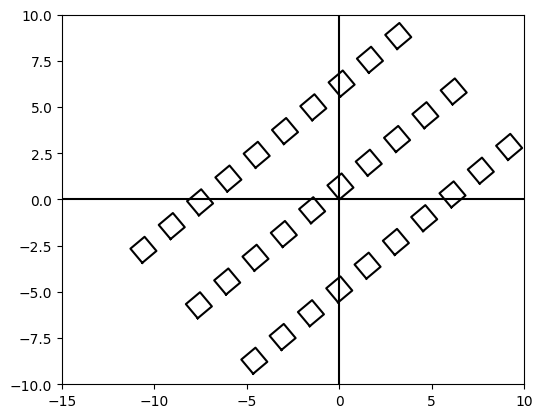

In [ ]:
total = 10
dx = -10
dy = 0
angle = 40


angle = [angle for i in range(total)]
gen_rectangles = [(gen_rectangle(i, dx, dy)) for i in range(total)]
new_rectangles = list(map(tr_rotate, gen_rectangles, angle))

dx = [-3 for i in range(total)]
dy = [3 for i in range(total)]
new_rectangles2 = list(map(tr_translate, new_rectangles,  dx, dy))

dx = [3 for i in range(total)]
dy = [-3 for i in range(total)]
new_rectangles3 = list(map(tr_translate, new_rectangles,  dx, dy))


visualize(new_rectangles + new_rectangles2 + new_rectangles3)

4.3 две параллельных ленты треугольников, ориентированных симметрично друг к другу;

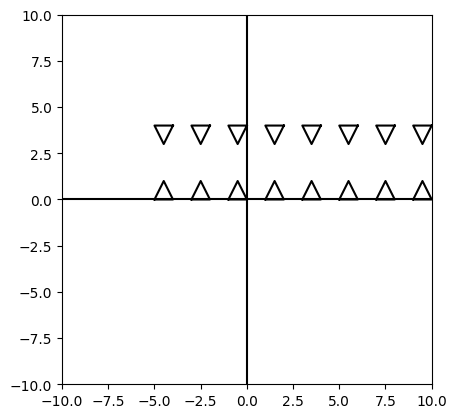

In [ ]:
total = 10
dx = -5
dy = 0
angle = 180

angle = [angle for i in range(total)]
gen_triangles = [(gen_triangle(i, dx, dy)) for i in range(total)]
dx = [-9 for i in range(total)]
dy = [-4 for i in range(total)]
new_triangles = list(map(tr_symmetry, gen_triangles, angle, dx, dy))
visualize(gen_triangles + new_triangles)

4.4 последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

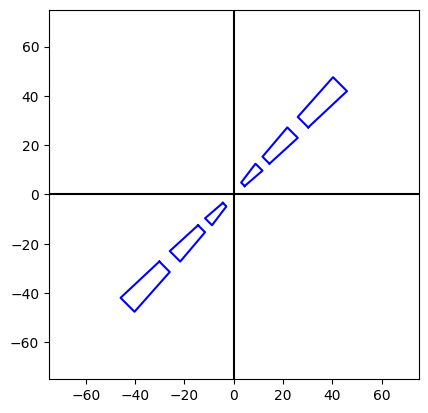

In [ ]:
z = 2
total = 6
dx = 0
dy = 0
angle = [45 for i in range(6)]
gen_rectangles = [(gen_rectangle(i, dx, dy)) for i in range(4)]
coord = list(map(tr_rotate, gen_rectangles, angle))
dx= [1.5 for i in range(6)]
dy = [1 for i in range(6)]
gen_rectangles = list(map(tr_translate, coord, dx, dy))
for i in range(0, len(coord)):
    gen_rectangles[i] = tr_homothety(gen_rectangles[i], (i+1) * 2)
for i in range(0, len(coord) - 1, 1):
    gen_rectangles[i] = gen_rectangles[i][3], gen_rectangles[i][2],  gen_rectangles[i + 1][1], gen_rectangles[i + 1][0]
gen_rectangles = gen_rectangles[:-1]


angle = [180 for i in range(3)]

new_rectangles = list(map(tr_symmetry, gen_rectangles, angle))
visualize(gen_rectangles + new_rectangles, 75)

new_rectangles_6_1 = gen_rectangles + new_rectangles

# 5. Реализовать операции:

5.1. фильтрации фигур, являющихся выпуклыми многоугольниками ( flt_convex_polygon )

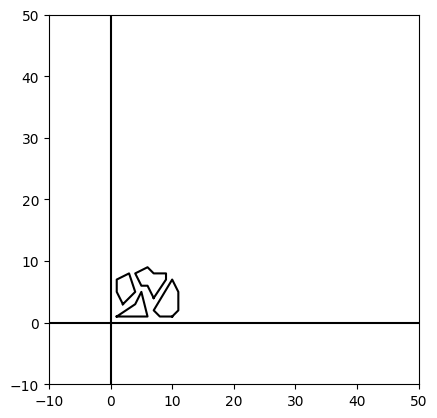

In [ ]:
import numpy as np

'''Алгоритм базируется на проверке ориентации векторного произведения для каждой последовательной тройки вершин многоугольника.
Алгоритм сравнивает знаки векторных произведений и определяет, является ли многоугольник выпуклым. Если знаки всех векторных произведений одинаковы, то многоугольник считается выпуклым.'''

def flt_convex_polygon(vertices):
    n = len(vertices)
    if n < 3:
        return False

    orientation = None
    for i in range(n):
        p1 = vertices[i]
        p2 = vertices[(i + 1) % n]
        p3 = vertices[(i + 2) % n]

        v1 = (p2[0] - p1[0], p2[1] - p1[1])
        v2 = (p3[0] - p2[0], p3[1] - p2[1])
        cross_product = v1[0] * v2[1] - v1[1] * v2[0]

        if cross_product != 0:
            if orientation is None:
                orientation = cross_product > 0
            elif orientation != (cross_product > 0):
                return False

    return True


fig = [((1,1), (6,1), (5,5), (4,3)), ((2,3), (1,5), (1,7), (3,8), (4,5)), ((7,4), (6,6), (5,6), (4,8), (6,9), (7,8), (9,8), (9,7)), ((10,1), (8,1), (7,2), (10,7), (11,5), (11,2))]
visualize(fig)


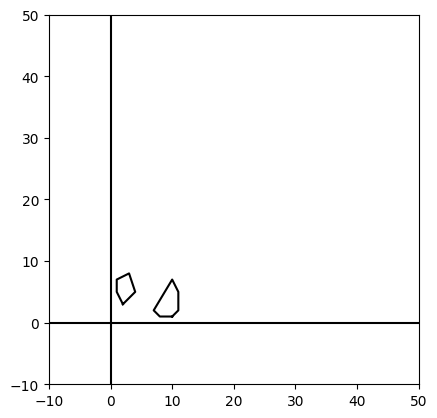

In [ ]:
fig = filter(flt_convex_polygon, fig)
visualize(fig)

5.2 фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой ( flt_angle_point )

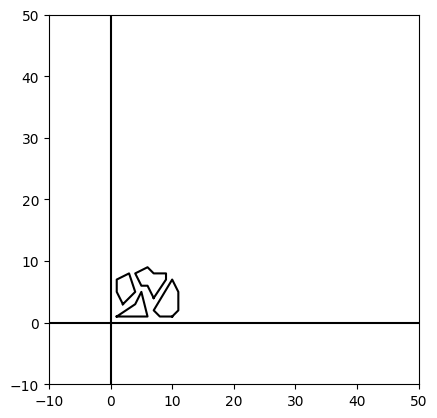

In [ ]:
def flt_angle_point(vertices, x = 0, y = 0):
  k = [False for i,j in vertices if i == x and j == y]
  return len(k) != 0

fig = [((1,1), (6,1), (5,5), (4,3)), ((2,3), (1,5), (1,7), (3,8), (4,5)), ((7,4), (6,6), (5,6), (4,8), (6,9), (7,8), (9,8), (9,7)), ((10,1), (8,1), (7,2), (10,7), (11,5), (11,2))]
visualize(fig)

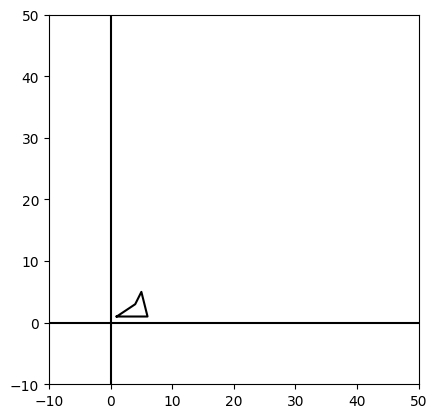

In [ ]:
fig = filter(lambda x: flt_angle_point(x, 6, 1), fig)
visualize(fig)

5.3 фильтрации фигур, имеющих площадь менее заданной ( flt_square )

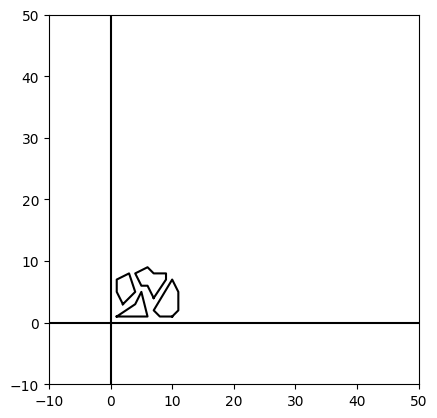

In [ ]:
def flt_square(vertices, sq = 10):
  n = len(vertices)
  square = 0
  for i in range(n):
      j = (i + 1) % n
      square += vertices[i][0] * vertices[j][1] - vertices[j][0] * vertices[i][1]
  return abs(square / 2) < sq

fig = [((1,1), (6,1), (5,5), (4,3)), ((2,3), (1,5), (1,7), (3,8), (4,5)), ((7,4), (6,6), (5,6), (4,8), (6,9), (7,8), (9,8), (9,7)), ((10,1), (8,1), (7,2), (10,7), (11,5), (11,2))]
visualize(fig)

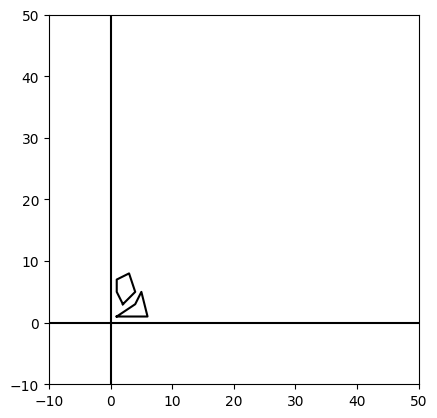

In [ ]:
new_fig = list(filter(lambda x: flt_square(x, 10), fig))
visualize(new_fig)

5.4 фильтрации фигур, имеющих кратчайшую сторону менее заданного значения ( flt_short_side )

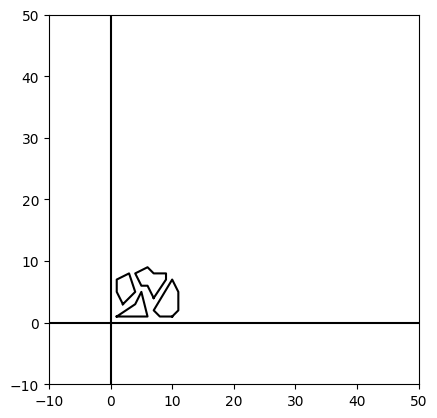

In [ ]:
def flt_short_side(vertices, min_size = 3):
  for point in range(-1, len(vertices) - 1):
    if math.dist(vertices[point], vertices[point + 1]) < min_size:
      return True
  return False

fig = [((1,1), (6,1), (5,5), (4,3)), ((2,3), (1,5), (1,7), (3,8), (4,5)), ((7,4), (6,6), (5,6), (4,8), (6,9), (7,8), (9,8), (9,7)), ((10,1), (8,1), (7,2), (10,7), (11,5), (11,2))]
visualize(fig)


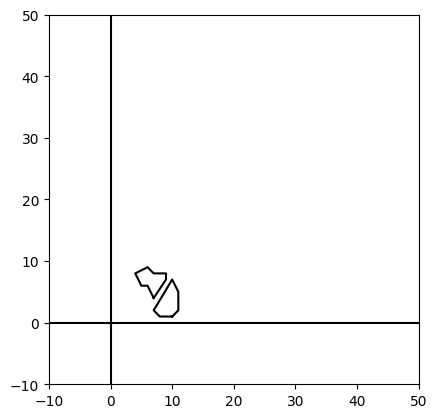

In [ ]:
new_fig = list(filter(lambda x: flt_short_side(x, 2), fig))
visualize(new_fig)

5.5 фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) ( flt_point_inside );

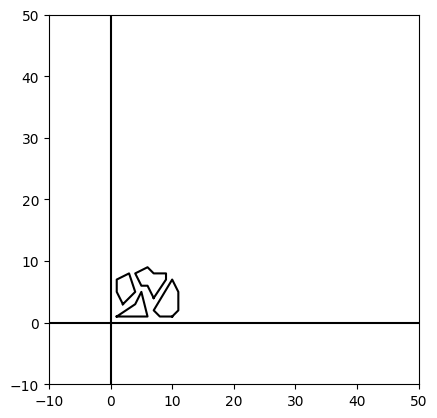

In [ ]:
'''5.5 Алгоритм Ray Casting (метод лучей) использует следующую идею: для определения, находится ли точка внутри многоугольника, проводятся лучи (лучи, исходящие от заданной точки) и
подсчитывается количество пересечений этих лучей с ребрами многоугольника. Если количество пересечений нечетное, то точка находится внутри многоугольника, иначе точка находится снаружи многоугольника.
Алгоритм Ray Casting проверяет каждое ребро многоугольника и определяет, есть ли пересечение с лучом, и если есть, то увеличивает счетчик пересечений. Для этого используется проверка условий,
которые учитывают положение точки относительно границы ребра.
Основная идея заключается в следующем:
 1 Проводится луч, исходящий от заданной точки (x, y).
 2 Проверяется каждое ребро многоугольника. Если условия пересечения выполняются, увеличивается счетчик пересечений.
 3 Если количество пересечений нечетное, то точка находится внутри многоугольника, иначе точка находится снаружи многоугольника.'''

def flt_point_inside(vertices, point=(5, 5)):
    n = len(vertices)
    if n < 3:
        return False

    x, y = point
    inside = False
    p1x, p1y = vertices[0]
    for i in range(1, n + 1):
        p2x, p2y = vertices[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y

    if (x, y) in vertices:
        inside = True

    return inside
fig = [((1,1), (6,1), (5,5), (4,3)), ((2,3), (1,5), (1,7), (3,8), (4,5)), ((7,4), (6,6), (5,6), (4,8), (6,9), (7,8), (9,8), (9,7)), ((10,1), (8,1), (7,2), (10,7), (11,5), (11,2))]
visualize(fig)

[((2, 3), (1, 5), (1, 7), (3, 8), (4, 5))]


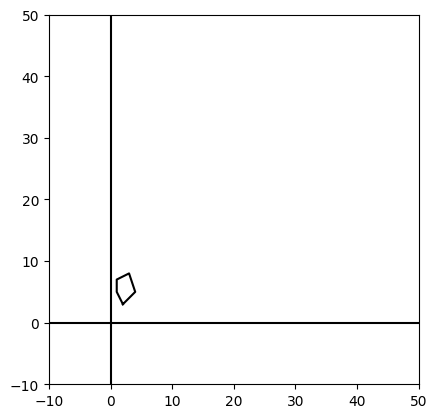

In [ ]:
point = (1 , 5)
new_fig = list(filter(lambda x: flt_point_inside(x, point), fig))
print(new_fig)
visualize(new_fig)

5.6 фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника ( flt_polygon_angles_inside )


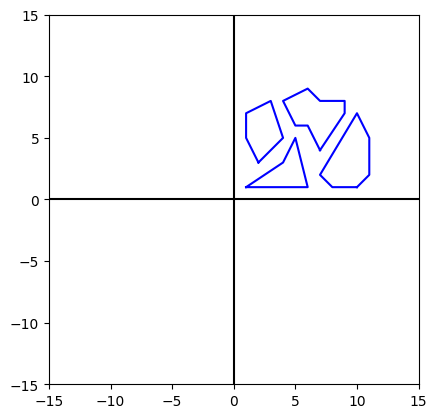

In [ ]:
def flt_polygon_angles_inside(new, vertices):
  for elem in vertices:
    if flt_point_inside(new, elem) == False:
      return False
  return True
fig = [((1,1), (6,1), (5,5), (4,3)), ((2,3), (1,5), (1,7), (3,8), (4,5)), ((7,4), (6,6), (5,6), (4,8), (6,9), (7,8), (9,8), (9,7)), ((10,1), (8,1), (7,2), (10,7), (11,5), (11,2))]
visualize(fig,15)


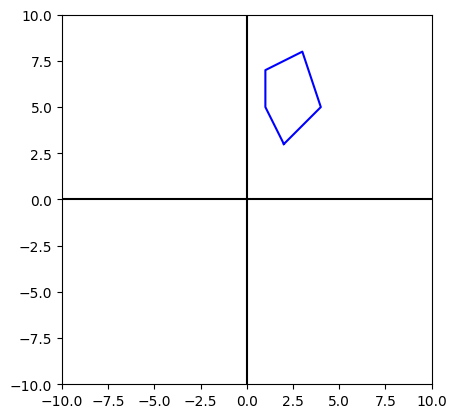

In [ ]:
fig = filter(lambda x: flt_polygon_angles_inside(x, ((2,3), (1,5), (1,7), (3,8), (4,5))), fig)
visualize(fig)

# 6. С помощью данных функций реализовать и визуализировать:

6.1. фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено 6 фигур;

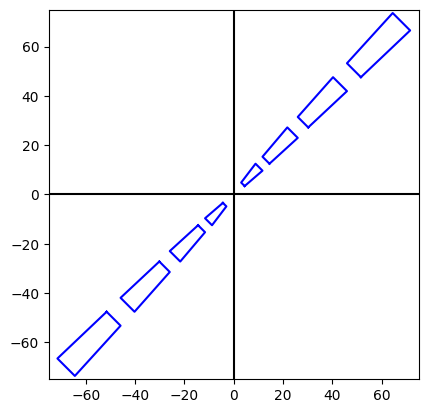

In [ ]:
new_fig = new_rectangles_6_1
new_fig = list(filter(lambda x: not flt_point_inside(x, (0, 2)), new_fig))   # (0,2) -> (5, 5)
new_fig = list(filter(lambda x: not flt_angle_point(x, 1, 1), new_fig))
new_fig = list(filter(lambda x: flt_square(x, 200), new_fig))
new_fig = list(filter(flt_convex_polygon, new_fig))
visualize(new_rectangles_6_1,75)

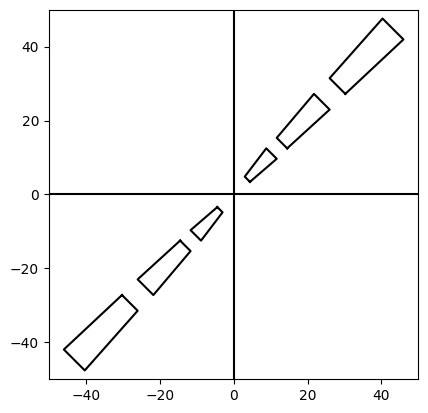

In [ ]:
visualize(new_fig)

6.2. используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур, которые имеют различный масштаб и выбрать из них (подбором параметра фильтрации) не более 4х фигур, имеющих кратчайшую сторону менее заданного значения;

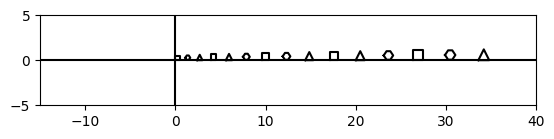

In [ ]:
total = 15
dx = 0
dy = 0
gen_mix = list(func(total, dx, dy))
k = 0.5
for i in range(15):
    gen_mix[i] = tr_homothety(gen_mix[i], k)
    k += 0.05
visualize(gen_mix)

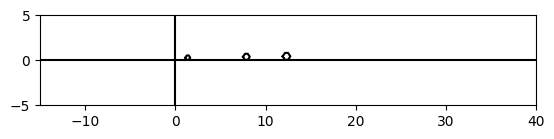

In [ ]:
new_gen_mix = filter(lambda x: flt_short_side(x, 0.4), gen_mix)
visualize(new_gen_mix)

6.3. используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.


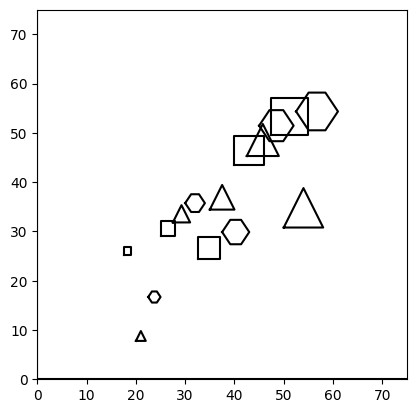

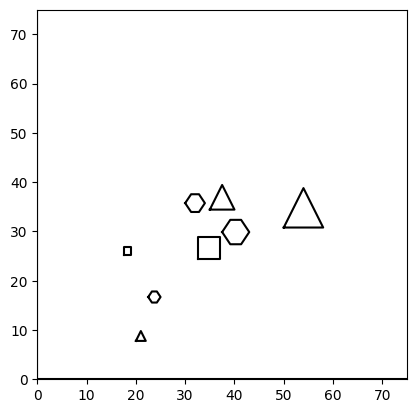

In [ ]:
funcs = [gen_rectangle, gen_triangle, gen_hexagon]
func_iterator = cycle(funcs)
x = 0
y = 3
kof = 1.5
gen_fig = []
for i in range(15):
    next_func = next(func_iterator)
    coord = next_func(1, x + 3, y)
    coord = tr_homothety(coord, kof)
    coord = tr_translate(coord, 0, random.uniform(0, 10))
    coord = tr_translate(coord, 10, random.uniform(0, 20))
    gen_fig.append(coord)
    kof += 0.5
visualize(gen_fig)
bad = []
for fig in gen_fig:
  for fug in gen_fig:
    k = list(filter(lambda x: flt_point_inside(fug, x), fig))
    if len(k) != 0 and fig != fug:
      bad.append(fig)
      bad.append(fug)
new_gen_fig = [i for i in gen_fig if i not in bad]
visualize(new_gen_fig)